<h1> TENSORFLOW MACHINE LEARNING </h1>

In [37]:
# CORE ALGORITHMS

# importing modules
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [38]:
# showing the first 5 rows
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [39]:
# training the feature columns

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) # associate every feature name with a list of unique vocabulary

for feature_name in NUMERIC_COLUMNS: 
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32)) # for the ones with numerical features


# print it
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [40]:
# The training process - Input Function
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    def input_function(): # inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # creates dataset object with data and its features
        if shuffle:
            ds = ds.shuffle(1000) # randomize the data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into baches of 32 and repeat the process of num of epochs
        return ds # return the batch dataset
    return input_function # return a function to use

train_input_fn = make_input_fn(dftrain, y_train) # get a dataset to train
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle = False) # for testing

In [41]:
# Creating the model
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

# Training the model
linear_est.train(train_input_fn) # train the model
result = linear_est.evaluate(eval_input_fn) # testing the model
clear_output() # clear the console for useless training outputs
print(result['accuracy']) # see the accuracy

0.75757575


In [42]:
# dictionary of one prediction
print(dfeval.loc[0]) # print the person
# print(result[0]['probabilities'][1]) # change of survival: index 1

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object


In [43]:
# print(result[0]['probabilities'][0]) # change of not survival: index 0

In [44]:
print(y_eval.loc[0]) # if they survive or not

0


In [45]:
# Classification

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [46]:
# see the data
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [47]:
# remove the species column and use that as our label
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [48]:
train_y.head() # species stored in train_y 

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [49]:
# shape of our train model
train.shape

(120, 4)

In [50]:
# Input Function
def input_fn(features, labels, training = True, batch_size = 256):
    # converts the inputs to a Dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # shuffle (random) and repeat 
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [51]:
# Feature Columns
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key = key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [52]:
# Building the Model

# build a DNN with 2 hidden layers (30 and 10 hidden nodes each)
classifier = tf.estimator.DNNClassifier(feature_columns = my_feature_columns, hidden_units = [30, 10], n_classes = 3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptc6uga7a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
# Training the Model
classifier.train(
    input_fn = lambda: input_fn(train, train_y, training = True), steps = 5000
)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmptc6uga7a/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.341773, step = 0
INFO:tensorflow:global_step/sec: 330.241
INFO:tensorflow:loss = 1.3385688, step = 100 (0.309 sec)
INFO:tensorflow:global_step/sec: 395.983
INFO:tensorflow:loss = 1.1674445, step = 200 (0.248 sec)
INFO:tensorflow:global_step/sec: 392.794
INFO:tensorflow:loss = 1.0581737, step = 300 (0.254 sec)
INFO:tensorflow:global_step/sec: 395.683
INFO:tensorflow:loss = 1.0118691, step = 400 (0.253 sec)
INFO:tensorflow:global_step/sec: 401.007
INFO:tensorflow:loss = 0.9630436, step = 500 (0.249 sec)
INFO:tensorflow:global_step/sec: 397.888


In [54]:
# Testing the Model

eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, test_y, training = False))
print('\nTest set accuracy: {accuracy: 0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-01-02T21:35:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptc6uga7a/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.15984s
INFO:tensorflow:Finished evaluation at 2024-01-02-21:35:32
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7, average_loss = 0.5908845, global_step = 5000, loss = 0.5908845
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmptc6uga7a/model.ckpt-5000

Test set accuracy:  0.700



In [55]:
# Predictions

def input_fn(features, batch_size=256):
    # convert the inputs to a Dataset without labels
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptc6uga7a/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (59.2%)


In [56]:
# Clustering & K-Means

# probability hot and cold day / weather model 
import tensorflow_probability as tfp
import tensorflow as tf

tfd = tfp.distributions # shortcut
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) #  first day has 80% of being cold and 20% of being hot
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3], [0.2, 0.8]]) # a cold day has 30% change of being followed by a hot day (70% change of being cold)
                                                                         # a hot day has a 20% chance of being followed by a cold day (80% change of being hot)
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) # loc = mean and standard deviation (average temperature is 15 and ranges from 5 to 25)

In [57]:
# create the hidden markov model
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7 # how many days we want to predict for
)

In [58]:
# to get the expected temperatures on each day
mean = model.mean() # calculate the probabilities

with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


In [59]:
# Neural Networks
from tensorflow import keras

# dataset includes 60.000 images for training and 10.000 images for testing
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training

In [60]:
# shape of dataset
train_images.shape # 60.000 images and images of 28x28 pixels (784 in total) 28 rows and 28 columns

(60000, 28, 28)

In [61]:
type(train_images) # type of data

numpy.ndarray

In [62]:
train_images[0, 23, 23] # show one pixel (image zero, row 23, columns 23)
# 0 for black and 255 for white

194

In [63]:
print(train_images) # multiple pixels

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [64]:
train_labels[:10] # 10 different classes for dataset / each integer represents a speicific article of clothing

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [65]:
# create an array of label names to indicate which is which
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

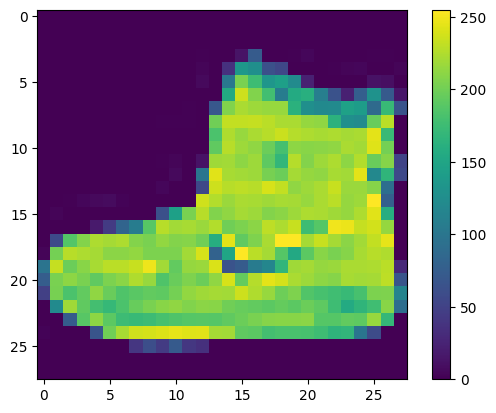

In [66]:
# what the images look like (10 examples)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

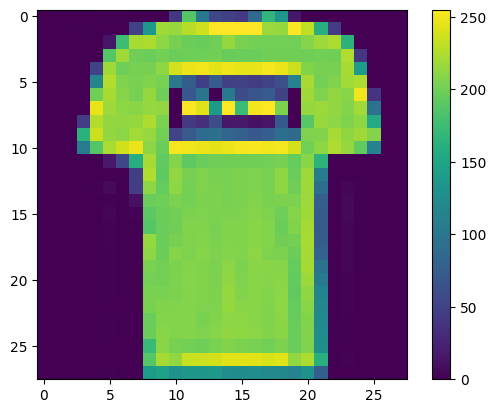

In [67]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

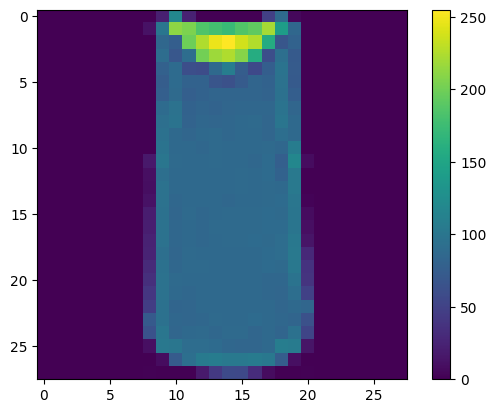

In [68]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

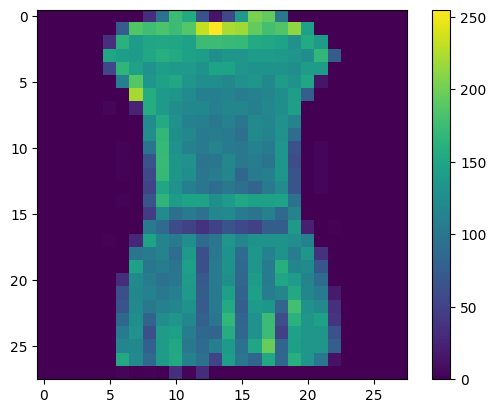

In [69]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

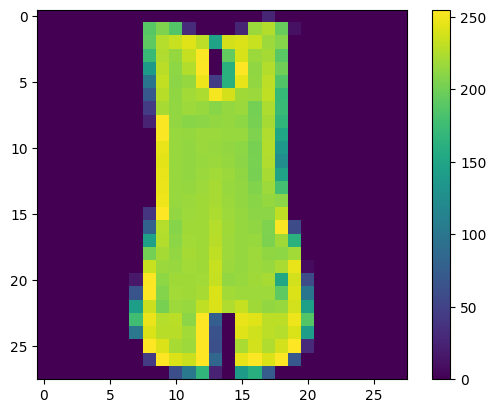

In [70]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

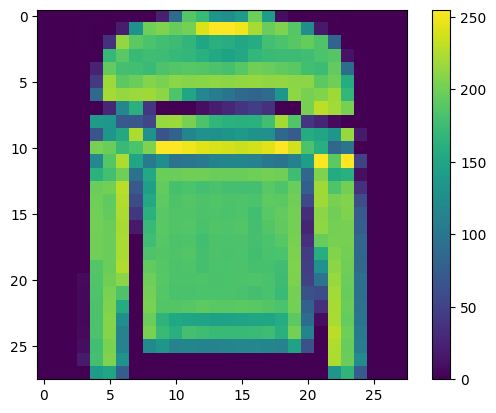

In [71]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

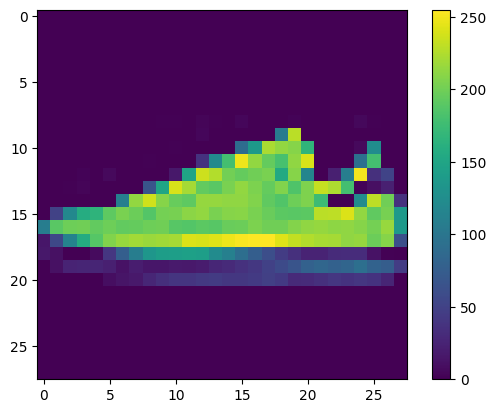

In [72]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

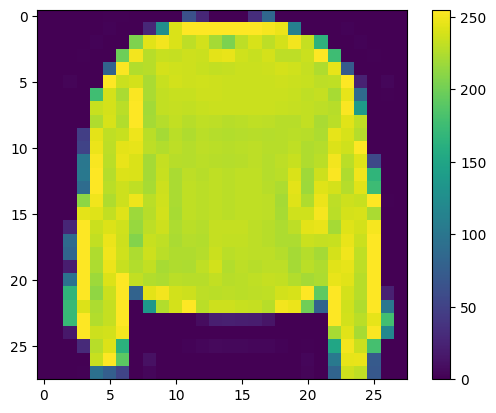

In [73]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

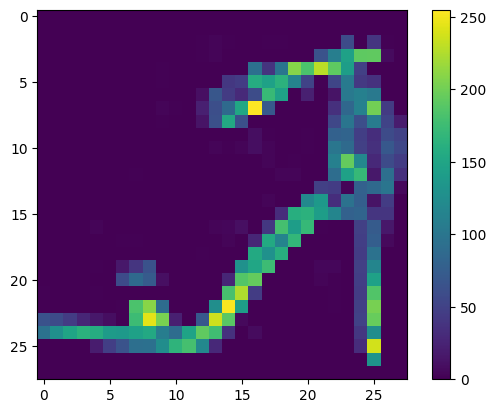

In [74]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

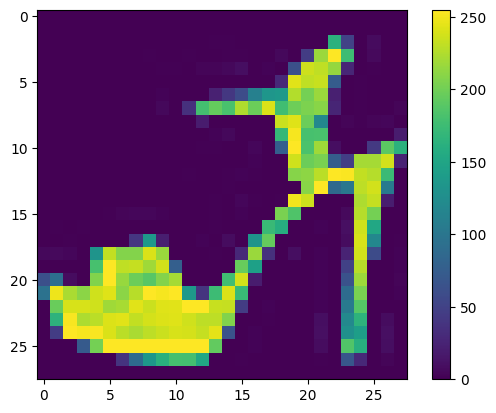

In [75]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

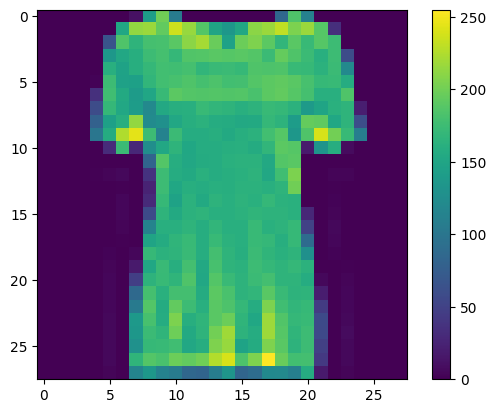

In [76]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [77]:
# Data Preprocessing

# squish all the values from 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [78]:
# Creating the Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), # input layer 1 => 784 pixels
    #dense (all the neurons from previous layer are connected to every neuron in this layer)
    keras.layers.Dense(128, activation = 'relu'), # hidden layer 2 => rectified linear unit (relu)
    keras.layers.Dense(10, activation = 'softmax') # output layer 3 => 10 classes to predict for
])

In [79]:
# Compile the Model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # algorithm performs the gradient descent

In [80]:
# Training the Model

model.fit(train_images, train_labels, epochs = 10) # epochs is a hyperparamter

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3383 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2476 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.240

In [81]:
# Testing the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1) # verbose (how much is printing out to the console)

print('Test accuracy:', test_acc) # overfitting (memorize the data)

313/313 [==============================] - 0s 802us/step - loss: 0.3539 - accuracy: 0.8721
Test accuracy: 0.8720999956130981


In [82]:
# Making Predictions

predictions = model.predict(test_images) # all the test images
print(predictions)

313/313 [==============================] - 0s 714us/step
[[9.92824084e-07 5.86175819e-09 1.96259418e-08 ... 1.82377975e-02
  2.73912576e-07 9.80591476e-01]
 [1.44876336e-04 2.18757101e-08 9.81926322e-01 ... 7.49465594e-14
  9.98530814e-10 5.99861520e-17]
 [2.35245690e-09 9.99999940e-01 4.79520763e-12 ... 3.51857232e-25
  1.77054281e-13 4.38204974e-14]
 ...
 [1.08621925e-05 9.78826709e-09 5.87805425e-06 ... 1.74296388e-09
  9.99954283e-01 1.29774519e-14]
 [6.43813181e-08 9.99975979e-01 3.92888722e-10 ... 2.52090422e-13
  2.29597639e-08 3.78741274e-11]
 [2.10854728e-06 5.35945821e-09 3.56504324e-06 ... 3.54024675e-03
  7.50920008e-05 5.23139124e-06]]


In [83]:
test_images.shape # array of 10.000 entries

(10000, 28, 28)

In [84]:
print(predictions[0]) # prediction 0

[9.9282408e-07 5.8617582e-09 1.9625942e-08 1.1278725e-06 1.0707468e-07
 1.1655450e-03 2.6471143e-06 1.8237798e-02 2.7391258e-07 9.8059148e-01]


In [85]:
print(np.argmax(predictions[0])) # prediction for a class

9


Ankle boot


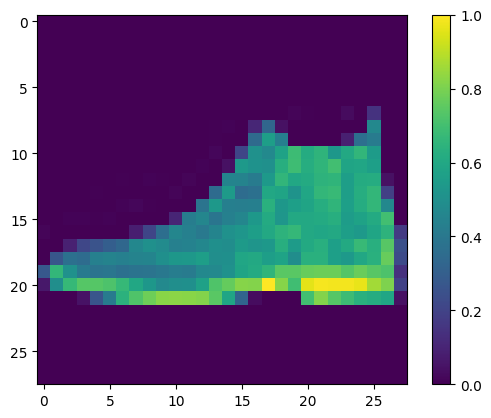

In [86]:
print(class_names[np.argmax(predictions[0])]) # prediction for a class

# show the image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pullover


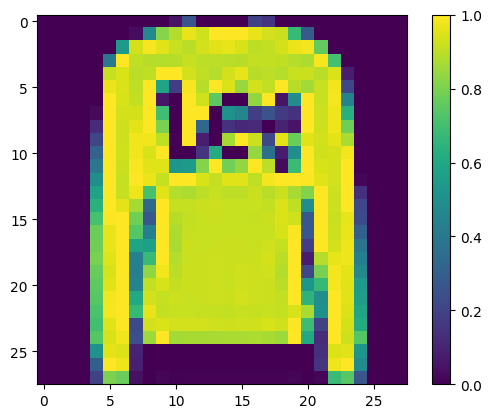

In [87]:
print(class_names[np.argmax(predictions[1])]) # prediction for a class

# show the image
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Trouser


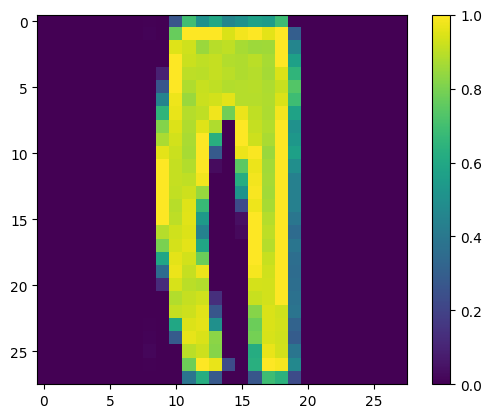

In [88]:
print(class_names[np.argmax(predictions[2])]) # prediction for a class

# show the image
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 15ms/step


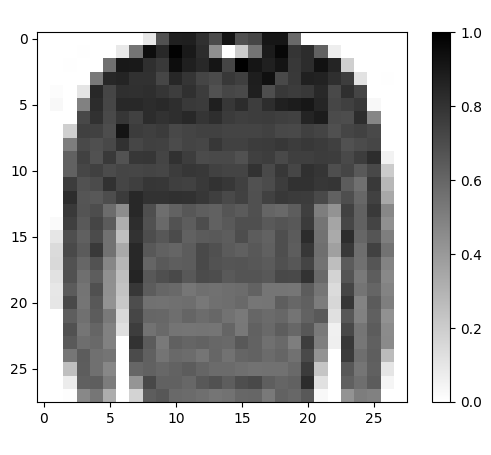

In [89]:
# type a number and show the image, expected and guess the clothes
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


In [96]:
# Deep Computer Vision

# Convolutional Neural Network

# CIFAR Image Dataset (60.000 images with 32x32 color images with 6000 images of each class)

# importing
from tensorflow.keras import datasets, layers, models 

# load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

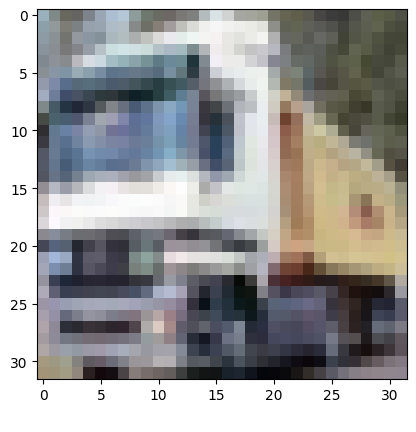

In [104]:
# look over images
IMG_INDEX = 1

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

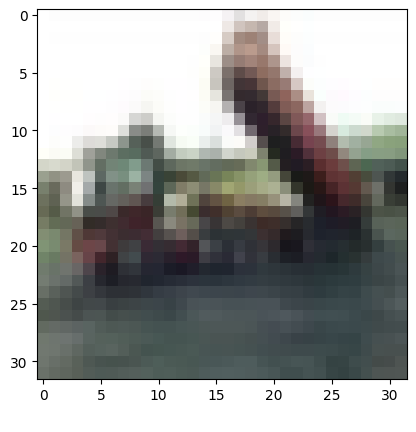

In [105]:
IMG_INDEX = 2

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

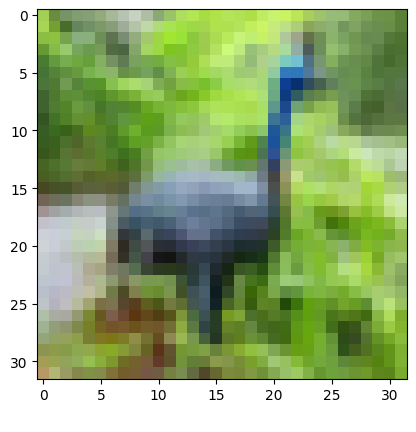

In [106]:
IMG_INDEX = 6

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

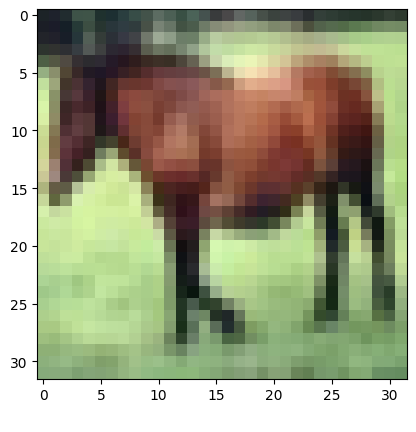

In [111]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [112]:
# CNN Arhitecture (define the layers)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # input data will be 32x32 pixels and process 32 filters
model.add(layers.MaxPooling2D((2, 2))) # max pooling operation using 2x2 samples and stride of 2
# take as input the feature map from the previous layer, increase frequency of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [114]:
# look at the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [116]:
# adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10)) # 10 neurons (one for each class)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [117]:
# Training
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.5676 - accuracy: 0.4213 - val_loss: 1.2675 - val_accuracy: 0.5399
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1731 - accuracy: 0.5791 - val_loss: 1.0928 - val_accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0130 - accuracy: 0.6404 - val_loss: 0.9994 - val_accuracy: 0.6467
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9077 - accuracy: 0.6803 - val_loss: 0.9460 - val_accuracy: 0.6657
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8355 - accuracy: 0.7049 - val_loss: 0.9097 - val_accuracy: 0.6869
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7725 - accuracy: 0.7267 - val_loss: 0.8781 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7143 - accuracy: 0.7487 - val_loss: 0.8553 -